In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Librerias para KNN
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#Librerias para Arbol
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
#Librerias para Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#Librerias para Perceptron
from sklearn.linear_model import Perceptron

DATOS DEL EJERCICIO 8 DE LA PL2

In [ ]:
import xlrd
datosCancerPulmon = pd.read_csv("/content/DatosCancerPulmon.csv")

datosCancerPulmon2 = datosCancerPulmon.copy()

X= np.array(datosCancerPulmon)

Y = X[:, -1]

print(len(X))
print(len(Y))

307
307


Oversamplig (muestras sintéticas)

In [ ]:
#Division en conjuntos de datos de entrenamiento y test, asignamos de momento 90 de entrenamiento y 10 test

X_Entrenamiento, X_test, Y_Entrenamiento, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

#Oversampling#creamos una función que crea el modelo que usaremos cada vez
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
"""
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='none',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
"""
#definimos funciona para mostrar los resultados
"""def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='LABELS', yticklabels='LABELS', annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
"""
def mostrar_resultados(y_test, pred_y):
    print (classification_report(y_test, pred_y))
os =  RandomOverSampler(sampling_strategy=0.5)
X_Entrenamiento_res, Y_Entrenamiento_res = os.fit_resample(X_Entrenamiento, Y_Entrenamiento)

print ("Distribucion antes de las muestras artificiales {}".format(Counter(Y_Entrenamiento)))
print ("Distribucion antes de las muestras artificiales {}".format(Counter(Y_Entrenamiento_res)))


#model = run_model(X_Entrenamiento_res, X_test, Y_Entrenamiento_res, Y_test)
#pred_y = model.predict(X_test)
#mostrar_resultados(Y_test, pred_y)


Distribucion antes de las muestras artificiales Counter({1: 241, 0: 35})
Distribucion antes de las muestras artificiales Counter({1: 241, 0: 120})


In [ ]:
#Dividimos el 10% del conjunto de test en 5% de test y 5% de validacion
X_validation, X_test, Y_validation, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)


KNN

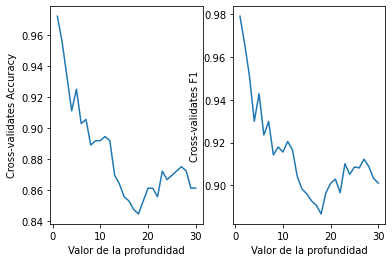

In [ ]:
list_k=range(1,31)
list_f1= []
list_precesion= []

for i in list_k:
  #Hiperparametro K de KNN
  k=KNeighborsClassifier(n_neighbors=i)

  k.fit(X_Entrenamiento_res,Y_Entrenamiento_res)

  precision = cross_val_score(k,X_Entrenamiento_res,Y_Entrenamiento_res,cv=5,scoring='accuracy')#para precisión en la clasificación
  f1 = cross_val_score(k,X_Entrenamiento_res,Y_Entrenamiento_res,cv=5,scoring='f1')# para la función de pérdida de regresión
 

  list_precesion.append(precision.mean())
  list_f1.append(f1.mean())
  
#Grafico
plt.subplot(1,2,1)
plt.plot(list_k,list_precesion)
plt.xlabel("Valor de la profundidad")
plt.ylabel("Cross-validates Accuracy")
plt.subplot(1,2,2)
plt.plot(list_k,list_f1)
plt.xlabel("Valor de la profundidad")
plt.ylabel("Cross-validates F1")
plt.show()

NAÏVE BAYES

In [ ]:
X_Bayes=X_Entrenamiento_res
Y_Bayes = Y_Entrenamiento_res

[1.0, 1.0, 0.9972222222222221, 0.9944444444444445, 0.9916666666666666, 0.9778158295281584, 0.975076103500761, 0.975076103500761, 0.9695205479452055, 0.9639649923896499, 0.9639649923896499, 0.9612252663622527, 0.9473363774733639, 0.9473363774733639, 0.944558599695586, 0.944558599695586, 0.9418188736681887, 0.9418188736681887, 0.9252283105022832, 0.9224505327245053, 0.9196727549467276, 0.9168949771689497, 0.9169330289193303, 0.9169330289193303, 0.9030441400304413, 0.8947108066971081, 0.8863774733637747, 0.8835996955859968, 0.8725646879756468]


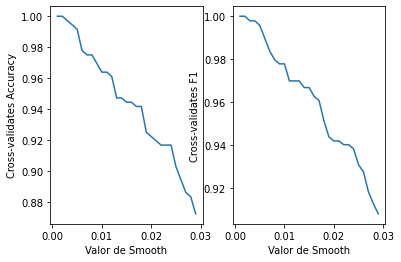

In [ ]:

list_bucle=range(1,30)
list_f1= []
list_precesion= []

list_smooth = []
for i in list_bucle:
  
  list_smooth.append(i*1e-3)

  modeloNB =  GaussianNB(var_smoothing = list_smooth[i-1])
  modeloNB.fit(X_Bayes, Y_Bayes)
  precision = cross_val_score(modeloNB, X_Bayes, Y_Bayes, cv = 5, scoring='accuracy')#para precisión en la clasificación
  
  f1 = cross_val_score(modeloNB,X_Bayes,Y_Bayes,cv=10,scoring='f1')# para la función de pérdida de regresión
 
  list_precesion.append(precision.mean())
  list_f1.append(f1.mean())
#Grafico
print(list_precesion)
plt.subplot(1,2,1)
plt.plot(list_smooth,list_precesion)
plt.xlabel("Valor de Smooth")
plt.ylabel("Cross-validates Accuracy")
plt.subplot(1,2,2)
plt.plot(list_smooth,list_f1)
plt.xlabel("Valor de Smooth")
plt.ylabel("Cross-validates F1")
plt.show()



ÁRBOL DE Clasificacion

In [ ]:
X_Arbol=X_Entrenamiento_res[:,:-1]
Y_Arbol = X_Entrenamiento_res[:, -1]

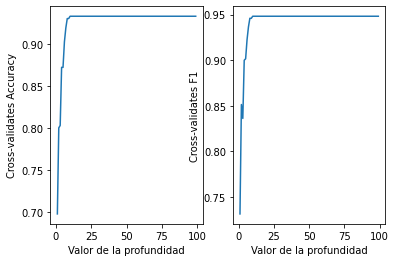

In [ ]:

list_depth=range(1,100)
list_f1= []
list_precesion= []
for i in list_depth:
  modeloArbol =  DecisionTreeClassifier(max_depth=i, random_state=0)
  
  modeloArbol.fit(X_Arbol, Y_Arbol)


  precision = cross_val_score(modeloArbol,X_Arbol,Y_Arbol,cv=10,scoring='accuracy')#para precisión en la clasificación
  
  f1 = cross_val_score(modeloArbol,X_Arbol,Y_Arbol,cv=10,scoring='f1')# para la función de pérdida de regresión
 
  list_precesion.append(precision.mean())
  list_f1.append(f1.mean())
  
#Dibujo
plt.subplot(1,2,1)
plt.plot(list_depth,list_precesion)
plt.xlabel("Valor de la profundidad")
plt.ylabel("Cross-validates Accuracy")
plt.subplot(1,2,2)
plt.plot(list_depth,list_f1)
plt.xlabel("Valor de la profundidad")
plt.ylabel("Cross-validates F1")
plt.show()


REDES NEURONALES 


In [ ]:
X_ANN=X_Entrenamiento_res[:,:-1]
Y_ANN = X_Entrenamiento_res[:, -1]

REDES NEURONALES: CON 1 CAPA




Usamos 20, 50 y 100 neuronas


Trabajando con  20  de neuronas...
El valor de la precision media es:  0.8337837837837838
El valor de la F1 media  es:  0.8797830995122586

Trabajando con  50  de neuronas...
El valor de la precision media es:  0.7782282282282283
El valor de la F1 media  es:  0.843449117252655

Trabajando con  100  de neuronas...
El valor de la precision media es:  0.7865615615615615
El valor de la F1 media  es:  0.8509660877468785
Imprimimos el grafico


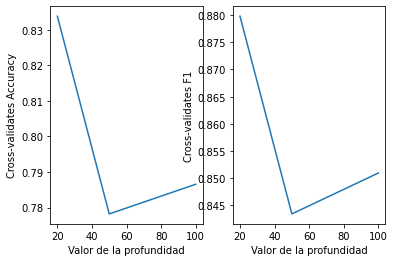

In [ ]:
from sklearn.neural_network import MLPClassifier

numero_neuronas = np.array([20, 50, 100])

list_f1= []
list_precesion= []
#Hay que cambiar el numero de capas y el numero de neuronas

for numero in numero_neuronas:
  print("\nTrabajando con ", numero, " de neuronas...")
  modeloANN = MLPClassifier(solver='adam',hidden_layer_sizes =numero,max_iter=1000,batch_size=24, random_state=0)  

  modeloANN.fit(X_ANN, Y_ANN)
  
  #print(f"Train coefficient of determination R^2: {round(modeloANN.score(X_ANN, Y_ANN)*100, 2)}%")
  precision = cross_val_score(modeloANN,X_ANN,Y_ANN,cv=10,scoring='accuracy')#para precisión en la clasificación
  f1 = cross_val_score(modeloANN,X_ANN,Y_ANN,cv=10,scoring='f1')# para la función de pérdida de regresión
  print("El valor de la precision media es: ", precision.mean())
  print("El valor de la F1 media  es: ",f1.mean() )
  list_precesion.append(precision.mean())
  list_f1.append(f1.mean())


#Dibujo
print("Imprimimos el grafico")
plt.subplot(1,2,1)
plt.plot(numero_neuronas,list_precesion)
plt.xlabel("Valor de la profundidad")
plt.ylabel("Cross-validates Accuracy")
plt.subplot(1,2,2)
plt.plot(numero_neuronas,list_f1)
plt.xlabel("Valor de la profundidad")
plt.ylabel("Cross-validates F1")
plt.show()

In [ ]:
print("Trabajando con 1 capa obtenemos: \n Usando 20 neuronas : Precision: ",
      list_precesion[0], ", F1: ", list_f1[0] )
print(" Usando 50 neuronas : Precision: ",
      list_precesion[1], ", F1: ", list_f1[1] )
print(" Usando 100 neuronas : Precision: ",
      list_precesion[2], ", F1: ", list_f1[2] )

Trabajando con 1 capa obtenemos: 
 Usando 20 neuronas : Precision:  0.8337837837837838 , F1:  0.8797830995122586
 Usando 50 neuronas : Precision:  0.7782282282282283 , F1:  0.843449117252655
 Usando 100 neuronas : Precision:  0.7865615615615615 , F1:  0.8509660877468785


CON 2 CAPAS


Con redes neuronales de 2 capas, usamos 3 configuraciones:


*   1º capa con 50 neuronas y 2º capa con 20 neuronas
*   1º capa con 50 neuronas y 2º capa con 50 neuronas
*   1º capa con 100 neuronas y 2º capa con 50 neuronas




In [ ]:
list_f1Capa2= []
list_precesionCapa2= []
#Hay que cambiar el numero de capas y el numero de neuronas
#2 Capas, 50(1 capa) 20 (2 capa) y 50(1 capa) 50(2 capa)
numero_neuronasCapa1= np.array([50, 50, 100])
numero_neuronasCapa2 = np.array([20, 50, 50])

for numero in range(0,3):
  print("\nTrabajando con")
  print("Capa 1 (numero neuronas): ",numero_neuronasCapa1[numero])
  print("Capa 2 (numero neuronas): ", numero_neuronasCapa2[numero])
  modeloANN = MLPClassifier(solver='adam',hidden_layer_sizes=(numero_neuronasCapa1[numero],numero_neuronasCapa2[numero]),
                            max_iter=1000,batch_size=24, random_state= 0)  

  modeloANN.fit(X_ANN, Y_ANN)
    
    #print(f"Train coefficient of determination R^2: {round(modeloANN.score(X_ANN, Y_ANN)*100, 2)}%")
  precision = cross_val_score(modeloANN,X_ANN,Y_ANN,cv=10,scoring='accuracy')#para precisión en la clasificación
  f1 = cross_val_score(modeloANN,X_ANN,Y_ANN,cv=10,scoring='f1')# para la función de pérdida de regresión
  print("El valor de la precision media es: ", precision.mean())
  print("El valor de la F1 media  es: ",f1.mean() )
  list_precesionCapa2.append(precision.mean())
  list_f1Capa2.append(f1.mean())




Trabajando con
Capa 1 (numero neuronas):  50
Capa 2 (numero neuronas):  20
El valor de la precision media es:  0.76996996996997
El valor de la F1 media  es:  0.8221016923321691

Trabajando con
Capa 1 (numero neuronas):  50
Capa 2 (numero neuronas):  50
El valor de la precision media es:  0.7783783783783784
El valor de la F1 media  es:  0.8439417686033603

Trabajando con
Capa 1 (numero neuronas):  100
Capa 2 (numero neuronas):  50
El valor de la precision media es:  0.7644144144144145
El valor de la F1 media  es:  0.8208950666276674


In [ ]:

print("Trabajando con 2 capas obtenemos: \n Usando en la primera capa 50 neuronas y en la segunda 20: Precision: ",
      list_precesionCapa2[0], ", F1: ", list_f1Capa2[0] )
print(" Usando en la primera capa 50 neuronas y en la segunda 50: Precision: ",
      list_precesionCapa2[1], ", F1: ", list_f1Capa2[1] )
print(" Usando en la primera capa 100 neuronas y en la segunda 50: Precision: ",
      list_precesionCapa2[2], ", F1: ", list_f1Capa2[2] )

Trabajando con 2 capas obtenemos: 
 Usando en la primera capa 50 neuronas y en la segunda 20: Precision:  0.76996996996997 , F1:  0.8221016923321691
 Usando en la primera capa 50 neuronas y en la segunda 50: Precision:  0.7783783783783784 , F1:  0.8439417686033603
 Usando en la primera capa 100 neuronas y en la segunda 50: Precision:  0.7644144144144145 , F1:  0.8208950666276674


CON 3 CAPAS

Con redes neuronales de 3 capas, usamos 3 configuraciones:


*   1º capa con 20 neuronas, 2º capa con 20 neuronas y 3º capa con 20 neuronas
*   1º capa con 50 neuronas, 2º capa con 50 neuronas y 3º capa con 50 neuronas
*   1º capa con 100 neuronas, 2º capa con 100 neuronas y 3º capa con 100 neuronas




In [ ]:
numero_neuronasCapa3= np.array([20, 50, 100])

list_f1Capa3= []
list_precesionCapa3= []

for numero in range(0,3):
  print("\nTrabajando con")
  print("Capa 1 (numero neuronas): ",numero_neuronasCapa3[numero])
  print("Capa 2 (numero neuronas): ", numero_neuronasCapa3[numero])
  print("Capa 3 (numero neuronas): ", numero_neuronasCapa3[numero])
  modeloANN = MLPClassifier(solver='adam',hidden_layer_sizes=(numero_neuronasCapa3[numero],numero_neuronasCapa3[numero],numero_neuronasCapa3[numero]),
                            max_iter=1000,batch_size=24, random_state= 0)  

  modeloANN.fit(X_ANN, Y_ANN)
    
    #print(f"Train coefficient of determination R^2: {round(modeloANN.score(X_ANN, Y_ANN)*100, 2)}%")
  precision = cross_val_score(modeloANN,X_ANN,Y_ANN,cv=10,scoring='accuracy')#para precisión en la clasificación
  f1 = cross_val_score(modeloANN,X_ANN,Y_ANN,cv=10,scoring='f1')# para la función de pérdida de regresión
  print("El valor de la precision media es: ", precision.mean())
  print("El valor de la F1 media  es: ",f1.mean() )
  list_precesionCapa3.append(precision.mean())
  list_f1Capa3.append(f1.mean())





Trabajando con
Capa 1 (numero neuronas):  20
Capa 2 (numero neuronas):  20
Capa 3 (numero neuronas):  20
El valor de la precision media es:  0.7894144144144144
El valor de la F1 media  es:  0.8425937308733868

Trabajando con
Capa 1 (numero neuronas):  50
Capa 2 (numero neuronas):  50
Capa 3 (numero neuronas):  50
El valor de la precision media es:  0.7977477477477478
El valor de la F1 media  es:  0.8491101414367084

Trabajando con
Capa 1 (numero neuronas):  100
Capa 2 (numero neuronas):  100
Capa 3 (numero neuronas):  100
El valor de la precision media es:  0.8005255255255257
El valor de la F1 media  es:  0.8545585953017797


In [ ]:

print("Trabajando con 3 capas obtenemos: \n Usando en la primera capa 20 neuronas, en la segunda 20 y en la tercera 20: Precision: ",
      list_precesionCapa3[0], ", F1: ", list_f1Capa3[0] )
print(" Usando en la primera capa 50 neuronas, en la segunda 50 y en la tercera 50: Precision: ",
      list_precesionCapa3[1], ", F1: ", list_f1Capa3[1] )
print(" Usando en la primera capa 100 neuronas, en la segunda 100 y en la tercera 100: Precision: ",
      list_precesionCapa3[2], ", F1: ", list_f1Capa3[2] )

Trabajando con 3 capas obtenemos: 
 Usando en la primera capa 20 neuronas, en la segunda 20 y en la tercera 20: Precision:  0.7894144144144144 , F1:  0.8425937308733868
 Usando en la primera capa 50 neuronas, en la segunda 50 y en la tercera 50: Precision:  0.7977477477477478 , F1:  0.8491101414367084
 Usando en la primera capa 100 neuronas, en la segunda 100 y en la tercera 100: Precision:  0.8005255255255257 , F1:  0.8545585953017797


5. Comparar,	 con	 criterios basado	 en	 la	 matriz	 de	 confusión los	 resultados	obtenidos	 con	 los	 distintos	 modelos	 sobre	 el	 conjunto	 de	 test.	 Se deberá	 seleccionar el	mejor modelo	(knn,	Bayes,	etc.) indicando	claramente	los	motivos	 por	los	cuales	se	hace	dicha elección	(2	puntos,	20	líneas	máximo)	


KNN: Evaluando el conjunto de test


In [ ]:
accuracy_test=k.score(X_test,Y_test)
print ("Test set accuracy: {:.2f}".format(accuracy_test), "\n")

Test set accuracy: 0.81 



Naive Bayes: Evaluando el conjunto de test


In [ ]:
X_testNB = X_test[:,:-1]  
Y_testNB = X_test[:, -1]

accuracy_testNB=modeloNB.score(X_test,Y_test)
print ("Test set accuracy: {:.2f}".format(accuracy_testNB), "\n")

Y_pred_test=modeloNB.predict(X_test)
print("Porcentaje de predicciones correctas(test)",100*metrics.accuracy_score(Y_test,Y_pred_test))


Test set accuracy: 0.94 

Porcentaje de predicciones correctas(test) 93.75


In [ ]:
X_testArbol = X_test[:,:-1]  
Y_testArbol = X_test[:,-1]
accuracy_testArbol=modeloArbol.score(X_testArbol,Y_testArbol)
print ("Test set accuracy: {:.2f}".format(accuracy_testArbol), "\n")

Y_pred_test=modeloArbol.predict(X_testArbol)
print("Porcentaje de predicciones correctas(test)",100*metrics.accuracy_score(Y_testArbol,Y_pred_test))

Test set accuracy: 0.88 

Porcentaje de predicciones correctas(test) 87.5


ANNs: Evaluando el conjunto de test

In [ ]:
X_testANN = X_test[:,:-1]  
Y_testANN = X_test[:,-1]
accuracy_testANN=modeloANN.score(X_testANN,Y_testANN)
print ("Test set accuracy: {:.2f}".format(accuracy_testANN), "\n")

Y_pred_test=modeloANN.predict(X_testANN)
print("Porcentaje de predicciones correctas(test)",100*metrics.accuracy_score(Y_testANN,Y_pred_test))

Test set accuracy: 0.94 

Porcentaje de predicciones correctas(test) 93.75


In [ ]:
numero_neuronasCapa3= np.array([20, 50, 100])
for numero in range(1,3):
  print(numero)
  print("numero ",numero_neuronasCapa3[numero] )


1
numero  50
2
numero  100


6. Empleando	 el	 conjunto	 de	 validación indicar	 si	 la	 elección	 realizada	
anteriormente	 es	 consistente	 explicando,	 en	 caso	 positivo	 o	 negativo	 los	
resultados	 obtenidos	 y	 las	 posibles	 mejoras	 al	 procedimiento. (1	 punto,	 10	
líneas	máximo)

KNN: Evaluando el conjunto de validación


In [ ]:
accuracy_test=k.score(X_validation,Y_validation)
print ("Validation set accuracy: {:.2f}".format(accuracy_test), "\n")

Validation set accuracy: 0.93 



Naïve Bayes: Evaluando el conjunto de validación

In [ ]:
X_validNB = X_validation[:,:-1]  
Y_validNB = X_validation[:, -1]

accuracy_validNB=modeloNB.score(X_validation,Y_validation)
print("Validation set accuracy: {:.2f}".format(accuracy_validNB), "\n")

Y_pred_valid=modeloNB.predict(X_validation)
print("Porcentaje de predicciones correctas (validación):",100*metrics.accuracy_score(Y_validation,Y_pred_valid))


Validation set accuracy: 0.93 

Porcentaje de predicciones correctas (validación): 93.33333333333333


Árbol de clasificación: evaluando el conjunto de validación

In [ ]:
X_validArbol = X_validation[:,:-1]  
Y_validArbol = X_validation[:,-1]
accuracy_validArbol=modeloArbol.score(X_validArbol,Y_validArbol)
print("Validation set accuracy: {:.2f}".format(accuracy_validArbol), "\n")

Y_pred_valid=modeloArbol.predict(X_validArbol)
print("Porcentaje de predicciones correctas (validación):",100*metrics.accuracy_score(Y_validArbol,Y_pred_valid))

Validation set accuracy: 1.00 

Porcentaje de predicciones correctas (validación): 100.0


ANN: evaluando el conjunto de validación

In [ ]:
X_validANN = X_validation[:,:-1]  
Y_validANN = X_validation[:,-1]
accuracy_validANN=modeloANN.score(X_validANN,Y_validANN)
print("Validation set accuracy: {:.2f}".format(accuracy_validANN), "\n")

Y_pred_valid=modeloANN.predict(X_validANN)
print("Porcentaje de predicciones correctas (validación):",100*metrics.accuracy_score(Y_validANN,Y_pred_valid))

Validation set accuracy: 0.93 

Porcentaje de predicciones correctas (validación): 93.33333333333333


7. Emplear	un	modelo	lineal	considerando	las	características	del	problema dado	
(no	continuidad	de	la	variable	objetivo) y empleando	algún	criterio	de	selección	
de	 parámetros	 óptimos	 necesariamente explicado	 en	 case.	 Comparar	 los	
resultados	 con	 el	 modelo	 óptimo	 seleccionado considerando	 las	 métricas	
propuestas	anteriormente.

Para ello, se empleará el modelo del Perceptrón

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

datosCancerPulmon = pd.read_csv("/content/DatosCancerPulmon.csv")
datosCancerPulmon2 = datosCancerPulmon.copy()
X= np.array(datosCancerPulmon)
Y = X[:, -1]
print(len(X))
print(len(Y))
X_Entrenamiento, X_test, Y_Entrenamiento, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    """X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )"""

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_Entrenamiento, Y_Entrenamiento)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(Y_test, predictions))

    """fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_Entrenamiento[:, 0], X_Entrenamiento[:, 1], marker="o", c=Y_Entrenamiento)

    x0_1 = np.amin(X_Entrenamiento[:, 0])
    x0_2 = np.amax(X_Entrenamiento[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_Entrenamiento[:, 1])
    ymax = np.amax(X_Entrenamiento[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()"""

307
307
Perceptron classification accuracy 1.0
